<a href="https://colab.research.google.com/github/Bhavanamish01/Titanic-passenger-survival/blob/main/titanic_passenger_survival_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC PASSENGER SURVIVAL

This analysis attempts to predicate the probability for survival of the Titanic passengers. In order to do this, I will use the different features available about the passengers, use a subset of the data to train an algorithm and then run the algorithm on the rest of the data set to get a prediction.


In [ ]:
#titanic analysis of death
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline


In [ ]:
import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [ ]:
df_train=pd.read_csv(r"/content/train.csv")
df_train.shape


(891, 12)

In [ ]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train=df_train.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
def Age_approx(cols):
  Age=cols[0]
  Pclass=cols[1]
   
  if pd.isnull(Age):
     if Pclass ==1:
        return 37
     elif Pclass ==2 :
         return 29
     else:
         return 24
  else:
    return Age       

In [ ]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
df_train['Age']=df_train[['Age','Pclass']].apply(Age_approx , axis=1)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df_train.dropna(inplace=True)
df_train .isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


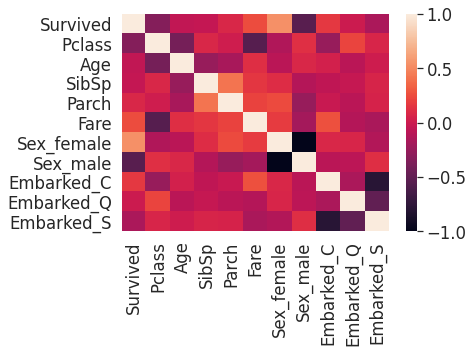

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [ ]:
used_features=["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]
x=df_train_dummied[used_features].values
y=df_train_dummied['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(622, 9)
(622,)
(267, 9)
(267,)


In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)


array([[143,  23],
       [ 22,  79]])

In [ ]:
len(x_test)


267

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [ ]:
logreg.coef_


array([[-1.04157843, -0.03986703, -0.2420805 , -0.04070764,  1.19330674,
        -1.19506857,  0.34912268, -0.0377803 , -0.31310422]])

In [ ]:
logreg.intercept_


array([3.65617663])

In [ ]:
df_train_dummied[used_features]


,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
888,3,24.0,1,2,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
logreg.predict_log_proba(x_test)

array([[-1.32645924, -0.30845007],
       [-0.92453202, -0.50536892],
       [-0.05406842, -2.94441737],
       [-1.34938837, -0.30029308],
       [-0.05752207, -2.88420971],
       [-2.00241079, -0.14503665],
       [-1.09920579, -0.40516849],
       [-0.65556567, -0.7321964 ],
       [-0.24640839, -1.5214406 ],
       [-0.89818315, -0.5230821 ],
       [-0.30099442, -1.34738869],
       [-1.55325365, -0.23769709],
       [-0.28951594, -1.38081286],
       [-1.92633613, -0.15745059],
       [-0.14551911, -1.99932525],
       [-0.99573491, -0.46116573],
       [-0.11245429, -2.24090876],
       [-1.21185629, -0.35331524],
       [-1.73531853, -0.19400234],
       [-0.91919143, -0.50889649],
       [-0.0999707 , -2.35244714],
       [-0.59272566, -0.80479058],
       [-0.14581154, -1.99746036],
       [-0.06459878, -2.77168532],
       [-0.66106341, -0.72629453],
       [-0.66193197, -0.72536826],
       [-3.24016364, -0.03994476],
       [-0.1402122 , -2.03388537],
       [-0.10754203,